In [ ]:
##########################################################################################
#                                                                                        #
#  888888b.  8888888 .d88888b.   .d8888b.     .d8888b.   .d8888b.      d8888      d8888  #
#  888  "88b   888  d88P" "Y88b d88P  Y88b   d88P  Y88b d88P  Y88b    d8P888     d8P888  #
#  888  .88P   888  888     888 Y88b.        888        888          d8P 888    d8P 888  #
#  8888888K.   888  888     888  "Y888b.     888d888b.  888d888b.   d8P  888   d8P  888  #
#  888  "Y88b  888  888     888     "Y88b.   888P "Y88b 888P "Y88b d88   888  d88   888  #
#  888    888  888  888     888       "888   888    888 888    888 8888888888 8888888888 #
#  888   d88P  888  Y88b. .d88P Y88b  d88P   Y88b  d88P Y88b  d88P       888        888  #
#  8888888P" 8888888 "Y88888P"   "Y8888P"     "Y8888P"   "Y8888P"        888        888  #
#                                                                                        # 
##########################################################################################
#
# Wrangle Synthetic Medical Record Data
#
##########################################################################################

## Fetch data
Go here: https://drive.google.com/drive/folders/0B5Wu8z15TIbiLUhvcWxaMDJCRGs

Get this data set: 10000-Patients.zip

unzip it into the Data folder

In [2]:
import pandas as pd
import pylab as plt
import numpy as np
import datetime as dt

In [3]:
##################################################################################################################
#
# YouDo: Import each of the 4 files into its own data frame
#         (Hint:  they're tab-separated)
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file into DataFrame.
    
    Also supports option

In [4]:
# 1) 
dfAdmissions = pd.read_csv('../Data/AdmissionsCorePopulatedTable.txt', sep='\t')
dfAdmissions.head()

,PatientID,AdmissionID,AdmissionStartDate,AdmissionEndDate
0,43556DC2-BCFC-45A8-84C3-1D3E4A11B02F,1,1974-07-26 15:05:30.333,1974-07-30 22:27:44.987
1,43556DC2-BCFC-45A8-84C3-1D3E4A11B02F,2,1983-11-12 03:34:39.083,1983-11-30 19:05:54.040
2,43556DC2-BCFC-45A8-84C3-1D3E4A11B02F,3,1998-09-28 12:08:17.843,1998-10-08 12:56:31.233
3,43556DC2-BCFC-45A8-84C3-1D3E4A11B02F,4,1999-04-03 01:49:32.610,1999-04-09 14:04:29.210
4,43556DC2-BCFC-45A8-84C3-1D3E4A11B02F,5,2001-11-26 03:07:07.303,2001-12-01 08:22:03.783


In [5]:
dfAdmissionsDiagnoses = pd.read_csv('../Data/AdmissionsDiagnosesCorePopulatedTable.txt', sep='\t')
dfAdmissionsDiagnoses.head()

,PatientID,AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
0,E74E9DF1-D8FD-41BC-8CDE-226CFE318E0B,1,E09.42,Drug or chemical induced diabetes mellitus wit...
1,E74E9DF1-D8FD-41BC-8CDE-226CFE318E0B,2,O29.123,Cardiac failure due to anesthesia during pregn...
2,E74E9DF1-D8FD-41BC-8CDE-226CFE318E0B,3,M84.561,"Pathological fracture in neoplastic disease, r..."
3,3AB69ECE-65F4-4D04-9E87-54E73C2DB4A8,1,G52.3,Disorders of hypoglossal nerve
4,3AB69ECE-65F4-4D04-9E87-54E73C2DB4A8,2,C40.31,Malignant neoplasm of short bones of right low...


In [6]:
dfLabs = pd.read_csv('../Data/LabsCorePopulatedTable.txt', sep='\t') #this took a long time to read into dataframe
dfLabs.head()

,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
0,915BC24E-8C44-4D33-A386-CEA965B83F32,1,CBC: HEMATOCRIT,40.7,%,1946-09-07 22:20:26.677
1,915BC24E-8C44-4D33-A386-CEA965B83F32,1,METABOLIC: ANION GAP,8.4,mmol/L,1946-09-07 11:52:58.600
2,915BC24E-8C44-4D33-A386-CEA965B83F32,1,CBC: LYMPHOCYTES,4.7,k/cumm,1946-09-07 06:08:57.303
3,915BC24E-8C44-4D33-A386-CEA965B83F32,1,CBC: HEMOGLOBIN,15.9,gm/dl,1946-09-07 19:16:10.057
4,915BC24E-8C44-4D33-A386-CEA965B83F32,1,METABOLIC: SODIUM,146.6,mmol/L,1946-09-07 14:03:11.003


In [7]:
dfPatient = pd.read_csv('../Data/PatientCorePopulatedTable.txt', sep='\t')
dfPatient.head()

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty
0,3A3C2AFB-FFFA-4E69-B4E6-73C1245D5D12,Male,1975-01-04 14:49:59.587,White,Single,Unknown,15.60
1,801AFB51-036F-40E3-BDFE-FED4844BE275,Male,1964-09-06 13:15:43.043,White,Unknown,English,13.23
2,366B0CC6-18AC-45DD-9AD4-BE884FE3A299,Female,1953-01-14 06:00:19.330,White,Married,English,12.11
3,DBB78149-D86C-435E-82C4-341999FD0719,Female,1986-04-28 12:42:02.007,Unknown,Unknown,Unknown,95.80
4,2C6269F4-71F8-4C07-A905-C08E9A3524C2,Female,1963-08-26 10:57:55.183,White,Unknown,English,18.08


In [8]:
##################################################################################################################
#
# YouDo: Notice that there are many columns with dates, but pandas assumed they're strings
#
#        1) use the pd.to_datetime() method to transform all of the time columns to have type datetime
#            # stretch goal:  do it in a loop based on the string 'Date' appearing in the column name
#
# Show the type
type(dfAdmissions['AdmissionStartDate'])


pandas.core.series.Series

In [8]:

# 1) 
dfAdmissionsDT['AdmissionStartDate'] = pd.to_datetime(dfAdmissions.AdmissionStartDate, format ="%m-%d-%Y %I:%M:%S %p")
dfAdmissionsDT(head)
#not sure why this is not working!

## Instructor comment:
#  This error is given at the end.
#  time data '1974-07-26 15:05:30.333' does not match format '%m-%d-%Y %I:%M:%S %p' (match)
#
#  The format you give says to expect month-day-year.  The data is year-month-day.

ValueError: time data '1974-07-26 15:05:30.333' does not match format '%m-%d-%Y %I:%M:%S %p' (match)

In [9]:
# As is typical in complex data sets, informtion about each patient is broken up into several different
# tables, cross-referenced by a patient id
##################################################################################################################
#
# YouDo: Print out the records from each of the four tables for patient number
# '327A3C2F-B234-400B-B994-833073C014C0'
dfAdmissions.dtypes #shows data types, patient ID is an object
#dfAdmissions['PatientID'] # this selects the right column
dfAdmissions.loc[(dfAdmissions['PatientID']== '327A3C2F-B234-400B-B994-833073C014C0')]

,PatientID,AdmissionID,AdmissionStartDate,AdmissionEndDate
15184,327A3C2F-B234-400B-B994-833073C014C0,1,1985-05-02 03:28:04.047,1985-05-07 02:33:18.970
15185,327A3C2F-B234-400B-B994-833073C014C0,2,1993-01-26 22:14:39.247,1993-02-01 22:25:06.137
15186,327A3C2F-B234-400B-B994-833073C014C0,3,1998-10-26 15:55:32.827,1998-11-03 02:48:41.307
15187,327A3C2F-B234-400B-B994-833073C014C0,4,2005-11-03 07:41:26.787,2005-11-11 08:24:10.020
15188,327A3C2F-B234-400B-B994-833073C014C0,5,2011-11-17 20:08:57.343,2011-12-04 19:19:03.410


In [10]:
dfAdmissionsDiagnoses.loc[(dfAdmissionsDiagnoses['PatientID']== '327A3C2F-B234-400B-B994-833073C014C0')]


,PatientID,AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
14737,327A3C2F-B234-400B-B994-833073C014C0,1,Z13.88,Encounter for screening for disorder due to ex...
14738,327A3C2F-B234-400B-B994-833073C014C0,2,M06.272,"Rheumatoid bursitis, left ankle and foot"
14739,327A3C2F-B234-400B-B994-833073C014C0,3,G54.4,"Lumbosacral root disorders, not elsewhere clas..."
14740,327A3C2F-B234-400B-B994-833073C014C0,4,C72.0,Malignant neoplasm of spinal cord
14741,327A3C2F-B234-400B-B994-833073C014C0,5,I24.0,Acute coronary thrombosis not resulting in myo...


In [11]:
dfLabs.loc[(dfLabs['PatientID']== '327A3C2F-B234-400B-B994-833073C014C0')]

,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
5846797,327A3C2F-B234-400B-B994-833073C014C0,1,URINALYSIS: WHITE BLOOD CELLS,1.8,wbc/hpf,1985-05-02 09:12:26.550
5846798,327A3C2F-B234-400B-B994-833073C014C0,1,CBC: RED BLOOD CELL COUNT,4.8,m/cumm,1985-05-02 18:05:24.573
5846799,327A3C2F-B234-400B-B994-833073C014C0,1,CBC: HEMATOCRIT,30.7,%,1985-05-02 09:48:19.407
5846800,327A3C2F-B234-400B-B994-833073C014C0,1,URINALYSIS: SPECIFIC GRAVITY,1.0,no unit,1985-05-02 14:57:08.487
5846801,327A3C2F-B234-400B-B994-833073C014C0,1,CBC: MEAN CORPUSCULAR VOLUME,75.8,fl,1985-05-02 15:37:22.123
5846802,327A3C2F-B234-400B-B994-833073C014C0,1,METABOLIC: ALT/SGPT,61.3,U/L,1985-05-02 14:26:57.563
5846803,327A3C2F-B234-400B-B994-833073C014C0,1,CBC: ABSOLUTE NEUTROPHILS,71.1,%,1985-05-02 14:40:09.590
5846804,327A3C2F-B234-400B-B994-833073C014C0,1,CBC: LYMPHOCYTES,4.5,k/cumm,1985-05-02 19:58:42.387
5846805,327A3C2F-B234-400B-B994-833073C014C0,1,METABOLIC: ALBUMIN,5.4,gm/dL,1985-05-02 11:11:52.860
5846806,327A3C2F-B234-400B-B994-833073C014C0,1,METABOLIC: BILI TOTAL,0.6,mg/dL,1985-05-02 10:22:09.793


In [12]:
dfPatient.loc[(dfPatient['PatientID']== '327A3C2F-B234-400B-B994-833073C014C0')]

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty
8097,327A3C2F-B234-400B-B994-833073C014C0,Female,1962-06-14 05:01:30.953,Asian,Single,English,18.96


In [154]:
# Holy cow!  this patient has 1203 lab results in her record
# This is synthetic data, so it's bound to have weird things.  Is that normal in this data?
##################################################################################################################
#
# You do:
#   1) Compute the average & standard deviation of number of labs per patient.
#         hint:  Consider pd.groupby()
#
#   2) Compute a list of each lab and how many orders for that lab are in the data frame
#         

In [14]:
#1)  
GBpatient = dfLabs.groupby('PatientID')
GBpatient['LabName'].describe().head()
#GB.get_group('327A3C2F-B234-400B-B994-833073C014C0') #this also worked to get the labs for this patient

## Instructor comment:
## You had a slightly different interpretation of the request--see my solution for details

,count,unique,top,freq
PatientID,,,,
0002C021-6DDD-433A-B9A0-2D26DF0C6AC0,1991,35,CBC: WHITE BLOOD CELL COUNT,65
0016C2C4-57EF-4333-A0C7-DFB88B90E9ED,1529,35,METABOLIC: GLUCOSE,51
00254AFD-EECD-4D34-95F6-015B2428178A,1768,35,METABOLIC: ALBUMIN,56
0028FB55-BC51-41BC-8393-28CC4C1D9800,1343,35,METABOLIC: GLUCOSE,44
002A0D81-4A0E-458C-90D7-9A2CE03253E8,1069,35,CBC: ABSOLUTE LYMPHOCYTES,35


In [26]:
# 2)
GBLabName = dfLabs.groupby('LabName')
GBLabName.head()

,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
0,915BC24E-8C44-4D33-A386-CEA965B83F32,1,CBC: HEMATOCRIT,40.7,%,1946-09-07 22:20:26.677
1,915BC24E-8C44-4D33-A386-CEA965B83F32,1,METABOLIC: ANION GAP,8.4,mmol/L,1946-09-07 11:52:58.600
2,915BC24E-8C44-4D33-A386-CEA965B83F32,1,CBC: LYMPHOCYTES,4.7,k/cumm,1946-09-07 06:08:57.303
3,915BC24E-8C44-4D33-A386-CEA965B83F32,1,CBC: HEMOGLOBIN,15.9,gm/dl,1946-09-07 19:16:10.057
4,915BC24E-8C44-4D33-A386-CEA965B83F32,1,METABOLIC: SODIUM,146.6,mmol/L,1946-09-07 14:03:11.003
5,915BC24E-8C44-4D33-A386-CEA965B83F32,1,METABOLIC: ALBUMIN,3.3,gm/dL,1946-09-08 04:06:53.967
6,915BC24E-8C44-4D33-A386-CEA965B83F32,1,METABOLIC: BUN,17.1,mg/dL,1946-09-07 19:41:39.247
7,915BC24E-8C44-4D33-A386-CEA965B83F32,1,CBC: NEUTROPHILS,8.4,k/cumm,1946-09-07 05:33:34.320
8,915BC24E-8C44-4D33-A386-CEA965B83F32,1,METABOLIC: CALCIUM,8.7,mg/dL,1946-09-07 16:23:41.213
9,915BC24E-8C44-4D33-A386-CEA965B83F32,1,METABOLIC: GLUCOSE,110.5,mg/dL,1946-09-07 09:40:39.467


In [ ]:
# It seems that this data set has the same patient getting the same labs perhaps dozens of times.
# Lets make a visualization of one of the time vs. one of the lab values for a specific patient.
##################################################################################################################
#
# You do:
#   1) Find the patient/lab combination with the most labs taken
#   2) For the most-measured patient/lab combination, make a time vs lab-value plot

In [16]:
# 1) 
GBpatient = dfLabs.groupby('PatientID')
desc = GBpatient['LabName'].describe().sort_values('freq')
desc.tail()
#assert biggest_value == 117 
#patient 3D33CC75-3EF0-49B5-9524-B4E8A7C08F25 had the following test run METABOLIC: BILI TOTAL	117 times


#assert biggest_value == 117



,count,unique,top,freq
PatientID,,,,
3971B340-79E2-45E5-B5E4-B490DD28F5AE,3514,35,METABOLIC: AST/SGOT,108
CEE98861-ABEE-4D4A-883C-85CDB300D0B9,3430,35,CBC: EOSINOPHILS,109
C28068EE-3752-4AD5-8195-D8740805F179,3586,35,METABOLIC: BILI TOTAL,112
5A191697-AB64-4943-96E6-FC0F1A696979,3570,35,CBC: ABSOLUTE NEUTROPHILS,113
3D33CC75-3EF0-49B5-9524-B4E8A7C08F25,3773,35,METABOLIC: BILI TOTAL,117


In [17]:
# 2) 
most_labs = dfLabs.loc[(dfLabs['PatientID']== '3D33CC75-3EF0-49B5-9524-B4E8A7C08F25')]
most_labs.head()

,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
5551820,3D33CC75-3EF0-49B5-9524-B4E8A7C08F25,1,CBC: HEMATOCRIT,44.4,%,1983-08-28 04:40:55.253
5551821,3D33CC75-3EF0-49B5-9524-B4E8A7C08F25,1,CBC: PLATELET COUNT,398.0,k/cumm,1983-08-28 08:16:27.743
5551822,3D33CC75-3EF0-49B5-9524-B4E8A7C08F25,1,METABOLIC: ANION GAP,9.8,mmol/L,1983-08-28 00:16:54.240
5551823,3D33CC75-3EF0-49B5-9524-B4E8A7C08F25,1,METABOLIC: ALBUMIN,4.0,gm/dL,1983-08-28 01:25:55.407
5551824,3D33CC75-3EF0-49B5-9524-B4E8A7C08F25,1,CBC: WHITE BLOOD CELL COUNT,3.6,k/cumm,1983-08-28 05:21:42.373


In [18]:
most_labs_BILI = most_labs.loc[most_labs['LabName'] == 'METABOLIC: BILI TOTAL', 'LabValue']
most_labs_BILI.head()

5551849    1.1
5551903    1.1
5551948    0.6
5551968    0.9
5551998    0.7
Name: LabValue, dtype: float64

In [19]:
BILI_LabDateTime = most_labs.loc[most_labs['LabName'] == 'METABOLIC: BILI TOTAL', 'LabDateTime']
BILI_LabDateTime.head()

5551849    1983-08-27 22:51:39.697
5551903    1983-08-29 23:04:13.783
5551948    1983-09-02 15:16:57.123
5551968    1983-09-03 19:17:57.780
5551998    1983-09-04 09:29:50.733
Name: LabDateTime, dtype: object

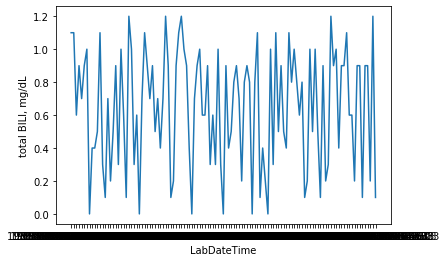

In [20]:
from matplotlib import pyplot as plt 
  

x = BILI_LabDateTime

y = most_labs_BILI
  
# Function to plot 
plt.plot(x,y) 
plt.xlabel('LabDateTime') 
plt.ylabel('total BILI, mg/dL') 
# function to show the plot 
plt.show() 
#not sure how to make the x axis cleaner and more readable since there are so many data points.  

## Instructor comment--It's all funky because it doesn't know that the date is a date.  If you get the 
#  to_datetime() bit to work at the beginning, it will naturally make a much nicer plot.

In [28]:
##################################################################################################################
#
# You do:
#   Closely inspect the plot you made.  
#
# 1) In order to compare this to another data set, your PI wants to know what the lab value was on August 6, 1985.  
#    What would you tell him/her (including all caveats)?
LabValue_08061985 = most_labs.loc[most_labs['LabDateTime'] == '1985-08-06 22:05:51.507' , 'LabValue']
print("total Bili value on 1985-08-06 22:05:51.507 was", LabValue_08061985)
# Unsure how to get the index value to not print.
# 2) How about the value for January 19, 1992?
print("Looks like there isn't a lab taken on January 19, 1992 for this patient")

total Bili value on 1985-08-06 22:05:51.507 was 5552362    0.5
Name: LabValue, dtype: float64
Looks like there isn't a lab taken on January 19, 1992 for this patient
